# Classificador Alfa

Nesse projeto, vamos construir e avaliar classificadores para identificar os fatores de risco para AVCs. Para isso, seguiremos os seguintes passos:

1. Treinar um classificador para predizer a ocorrência de AVCs
2. Verificar a acurácia do classificador
3. Identificar quais fatores realmente influenciam na ocorrência de AVCs

Para isso, vamos utilizar o dataset [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset), disponível no Kaggle.

### Importando as bibliotecas e os dados

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [132]:
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv(os.path.join('data', 'healthcare-dataset-stroke-data.csv'))

In [134]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [136]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [137]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [138]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

No dataset, possuímos 5110 entradas, sendo que apenas a coluna `BMI` possui entradas nulas. Como a quantidade de entradas nulas é pequena, vamos substituir os valores nulos pela mediana dos valores da coluna. Também vamos remover a coluna `id`, pois ela não possui nenhuma informação relevante para o nosso problema.

### Análise exploratória

Agora, realizaremos uma análise exploratória dos dados para entendermos melhor o nosso problema. Ademais, vamos verificar também se podemos obter algum entendimento sobre quais classes realmente podem influenciar na ocorrência de AVCs.

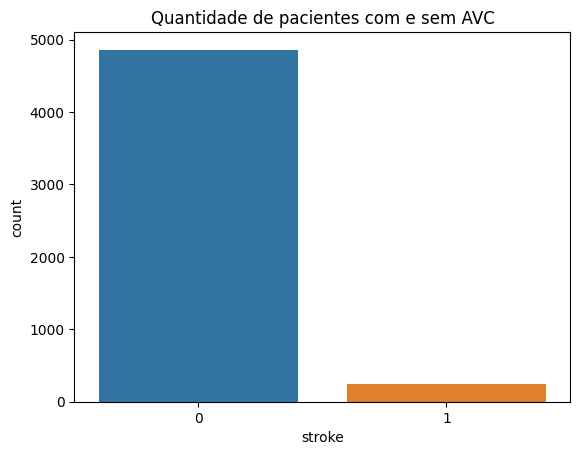

In [139]:
sns.countplot(x='stroke', data=df)
plt.title('Quantidade de pacientes com e sem AVC')
plt.show()

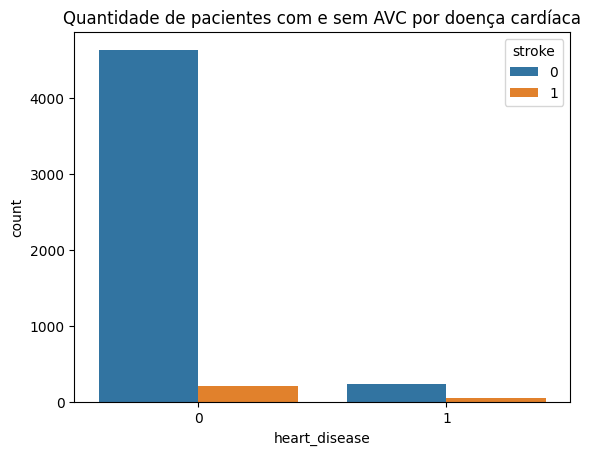

In [140]:
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title('Quantidade de pacientes com e sem AVC por doença cardíaca')
plt.show()

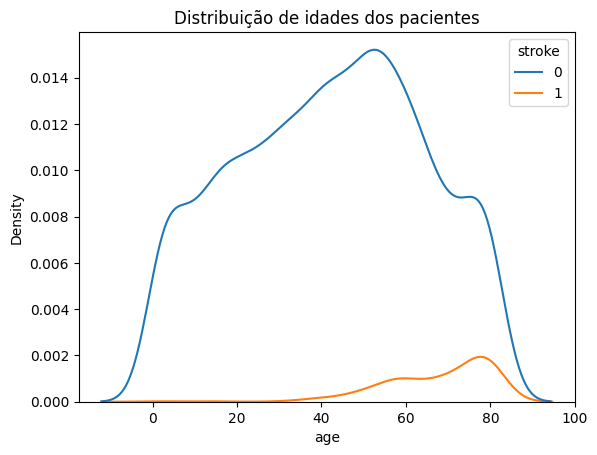

In [141]:
sns.kdeplot(x='age', data=df, hue='stroke')
plt.title('Distribuição de idades dos pacientes')
plt.show()

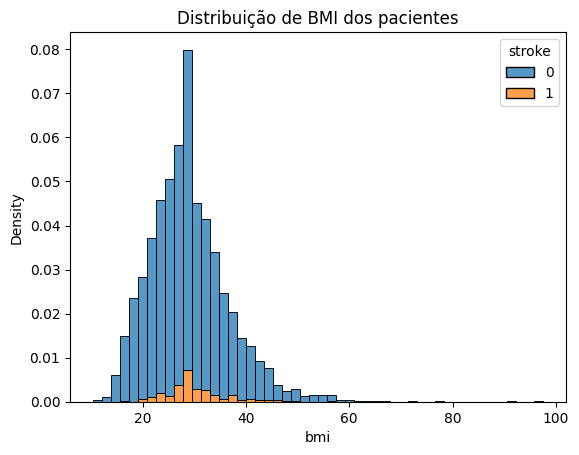

In [142]:
sns.histplot(x='bmi', data=df, hue='stroke', multiple='stack', stat='density', bins=50)
plt.title('Distribuição de BMI dos pacientes')
plt.show()

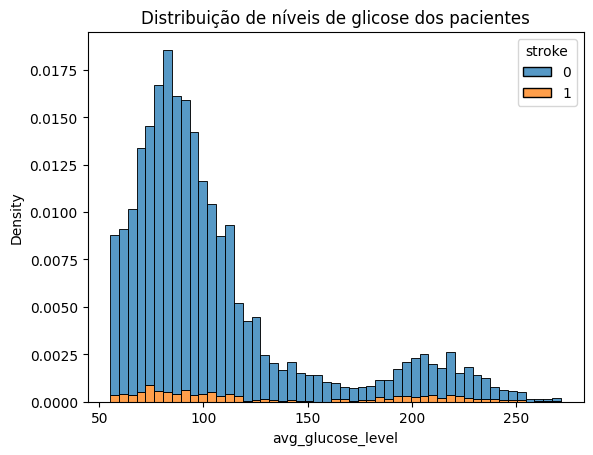

In [143]:
sns.histplot(x='avg_glucose_level', data=df, hue='stroke', multiple='stack', stat='density')
plt.title('Distribuição de níveis de glicose dos pacientes')
plt.show()

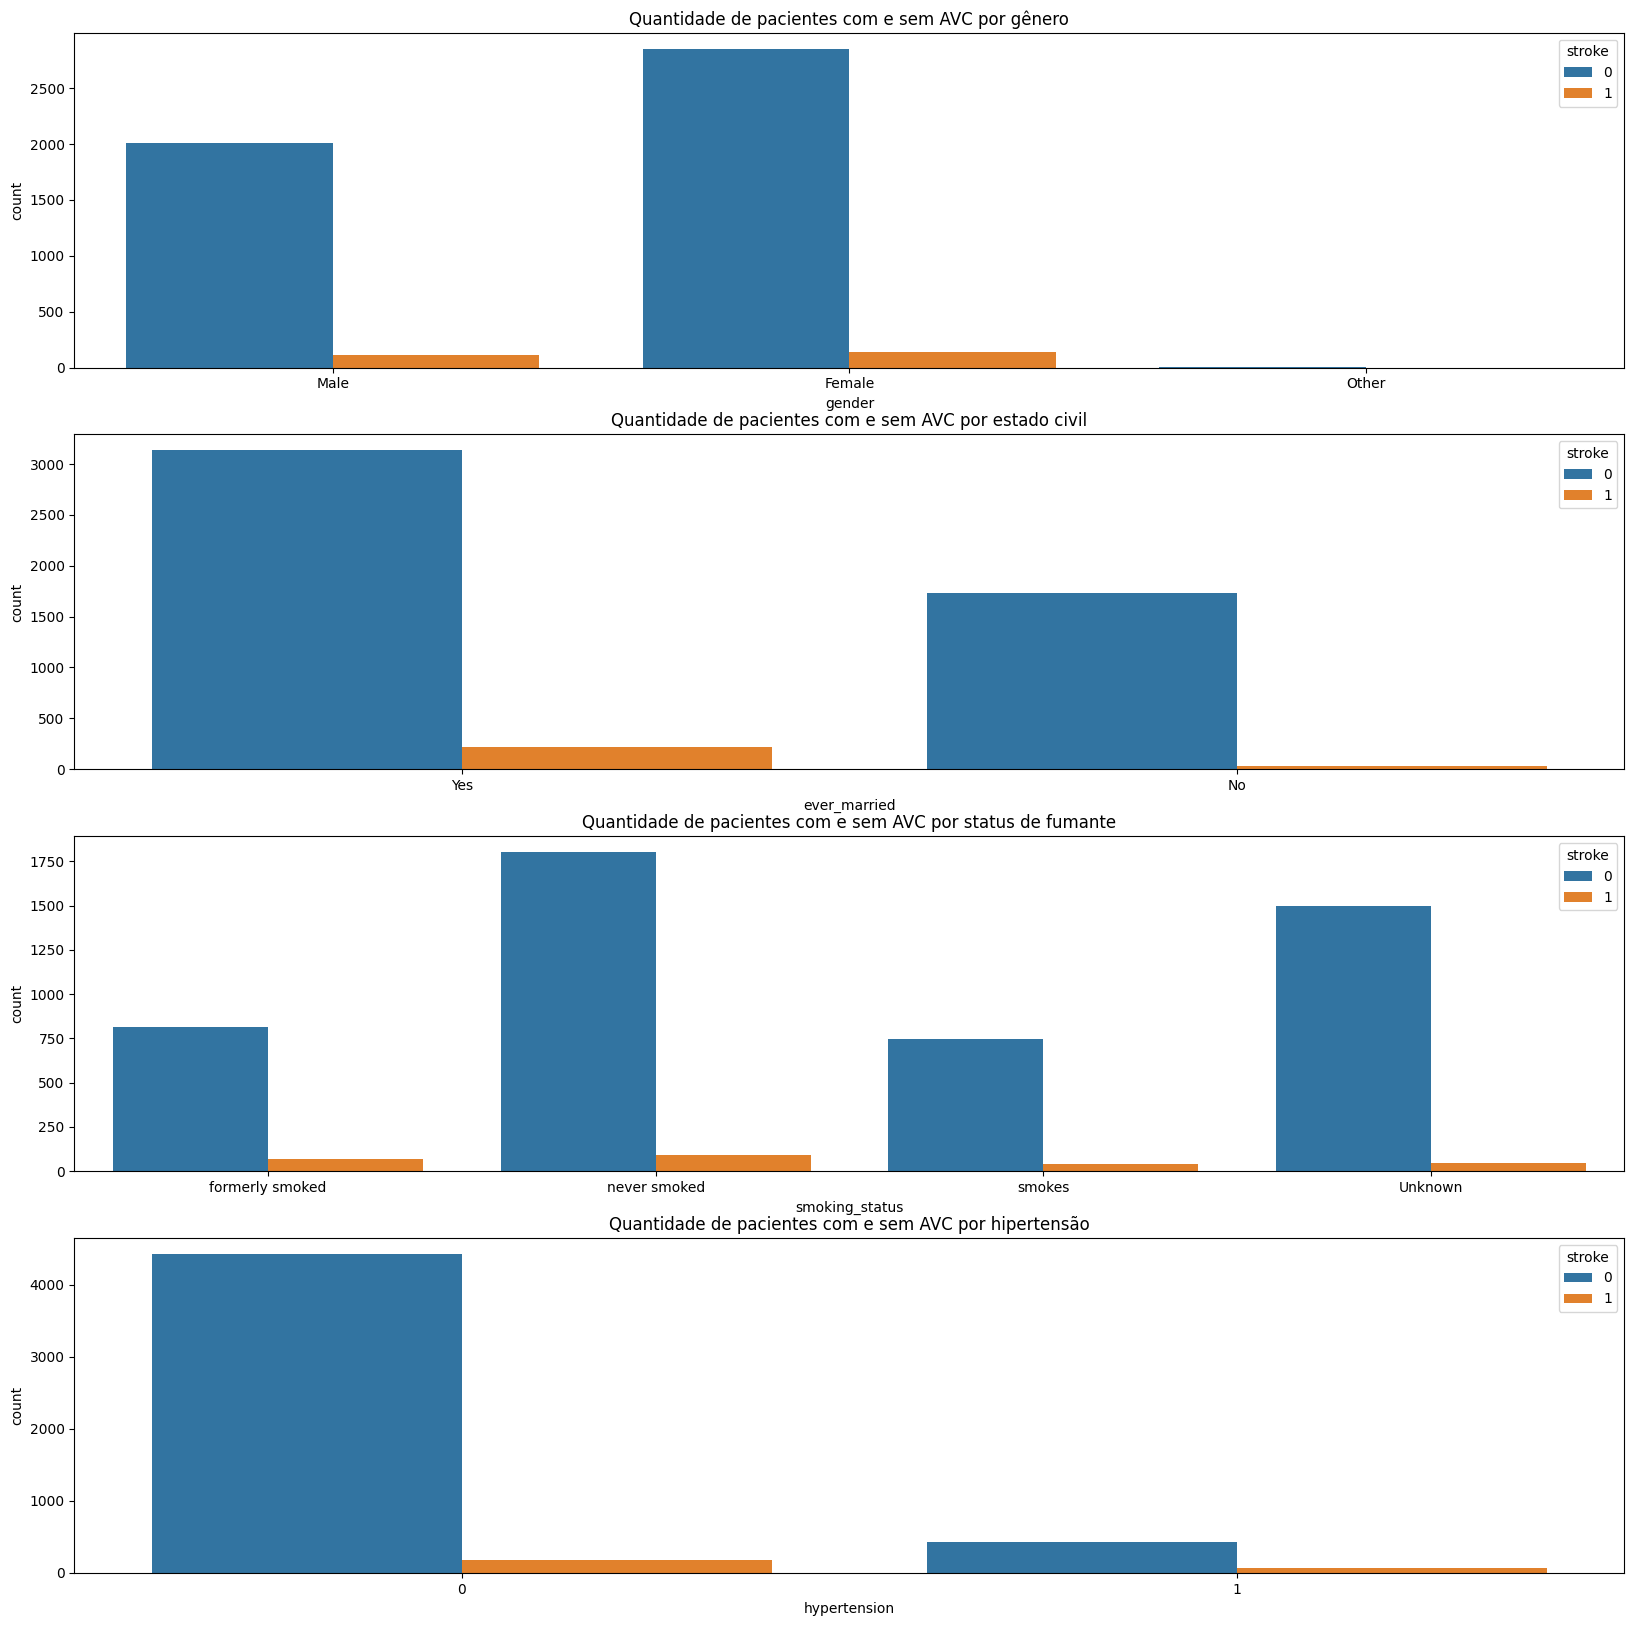

In [144]:
fig, ax = plt.subplots(4, 1, figsize=(20, 20))
ax1 = sns.countplot(data=df, x='gender', hue='stroke', ax=ax[0])
ax2 = sns.countplot(data=df, x='ever_married', hue='stroke', ax=ax[1])
ax3 = sns.countplot(data=df, x='smoking_status', hue='stroke', ax=ax[2])
ax4 = sns.countplot(data=df, x='hypertension', hue='stroke', ax=ax[3])
ax1.set_title('Quantidade de pacientes com e sem AVC por gênero')
ax2.set_title('Quantidade de pacientes com e sem AVC por estado civil')
ax3.set_title('Quantidade de pacientes com e sem AVC por status de fumante')
ax4.set_title('Quantidade de pacientes com e sem AVC por hipertensão')
plt.show()

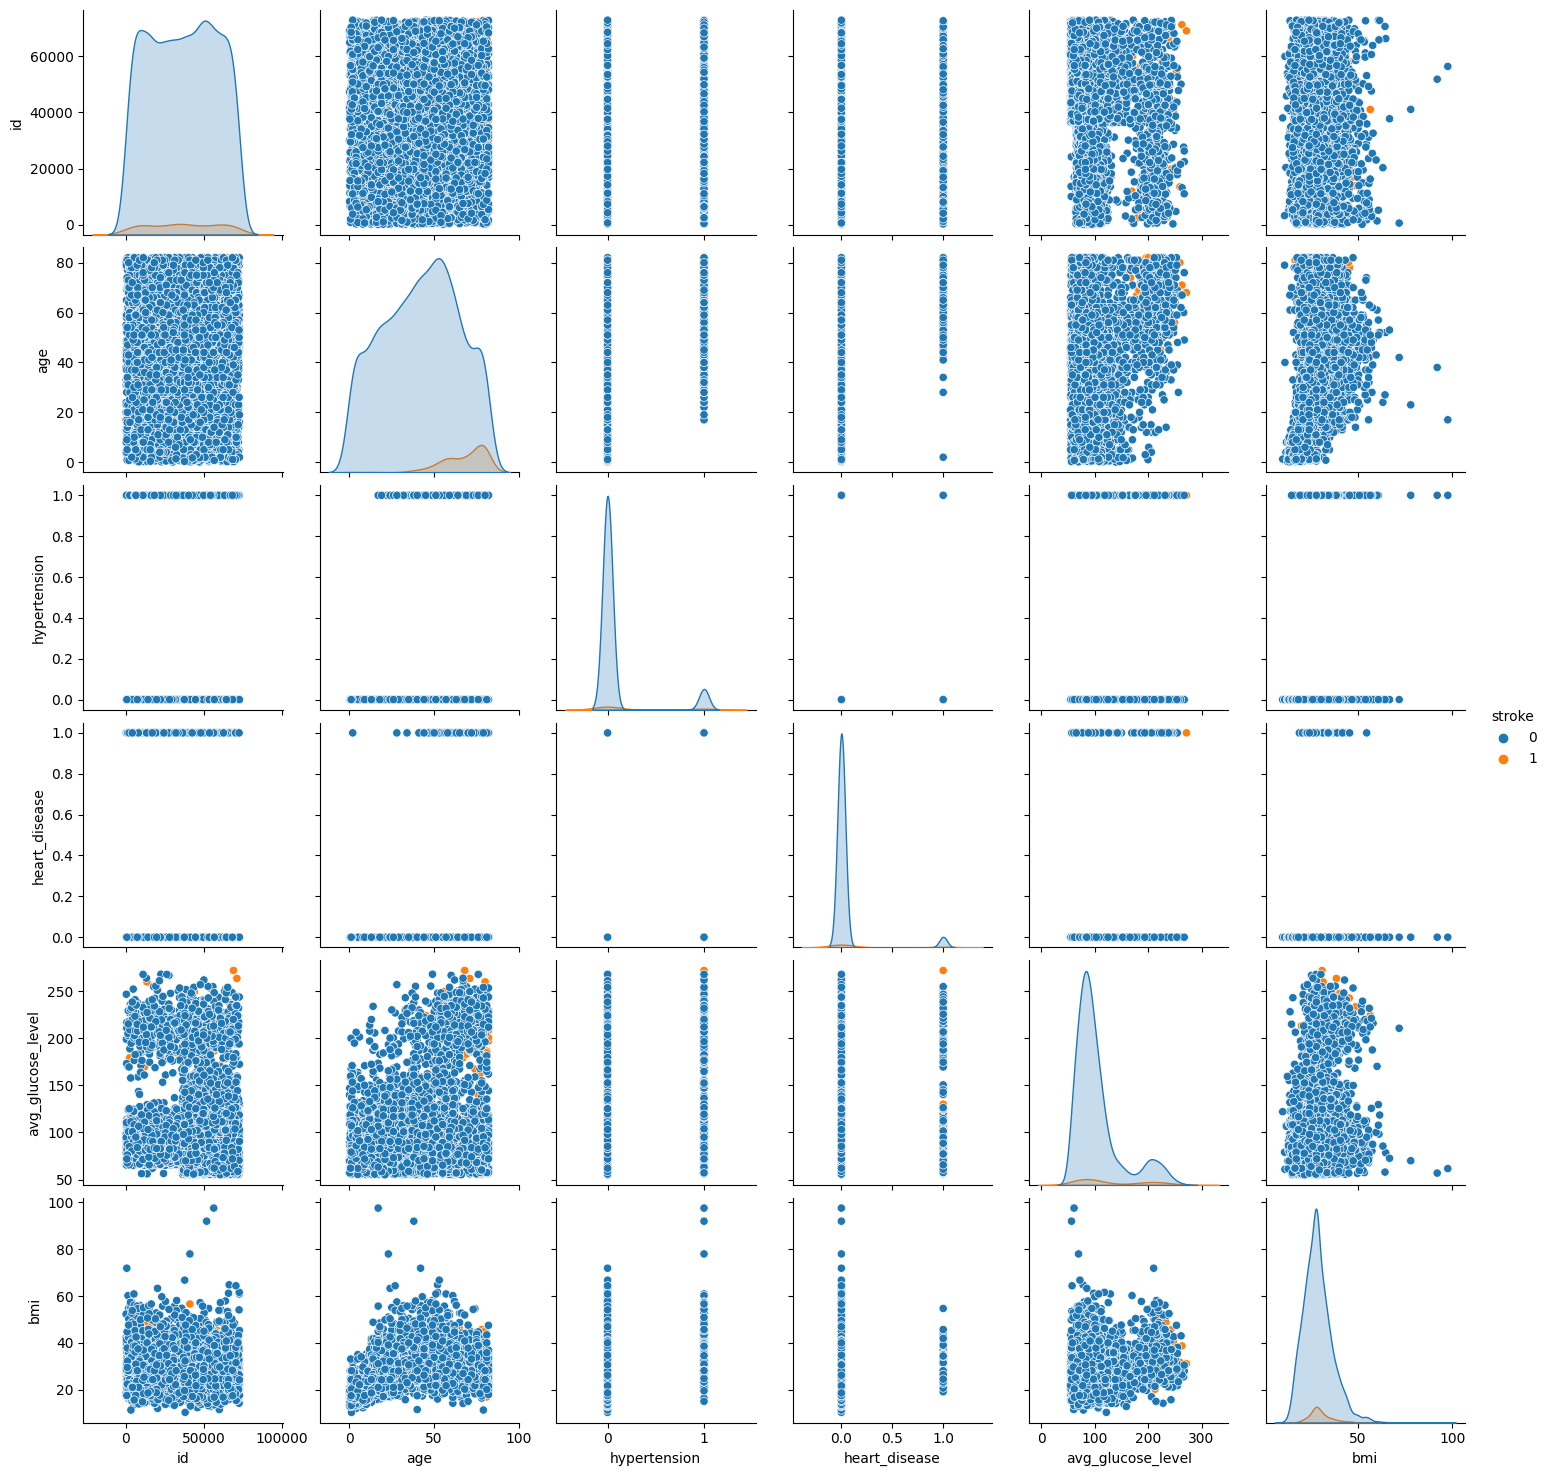

In [145]:
sns.pairplot(df, hue='stroke')
plt.show()

Realizando a análise visual, não foi possível obter nenhuma informação relevante sobre quais classes realmente podem influenciar na ocorrência de AVCs. Porém, podemos observar que a quantidade de pacientes com AVCs é muito menor do que a quantidade de pacientes sem AVCs, tornando a análise visual difícil. O `pairplot` realizado anteriormente, que mostra a relação entre as variáveis, também não se mostrou muito útil por conta da pouca quantidade de observações em que ocorreu AVCs, e por conta de a maioria das variáveis serem categóricas.
É possível observar algumas relações entre as variáveis, como por exemplo, a relação entre `age` e `hypertension`, e a relação entre `age` e `heart_disease`. Porém, não é possível obter nenhuma informação relevante sobre a ocorrência de AVCs. É possível observar que pessoas com idade acima de 40 anos possuem maior ocorrência de AVCs. A seguir, vamos realizar uma análise estatística para verificar se podemos obter alguma informação relevante.

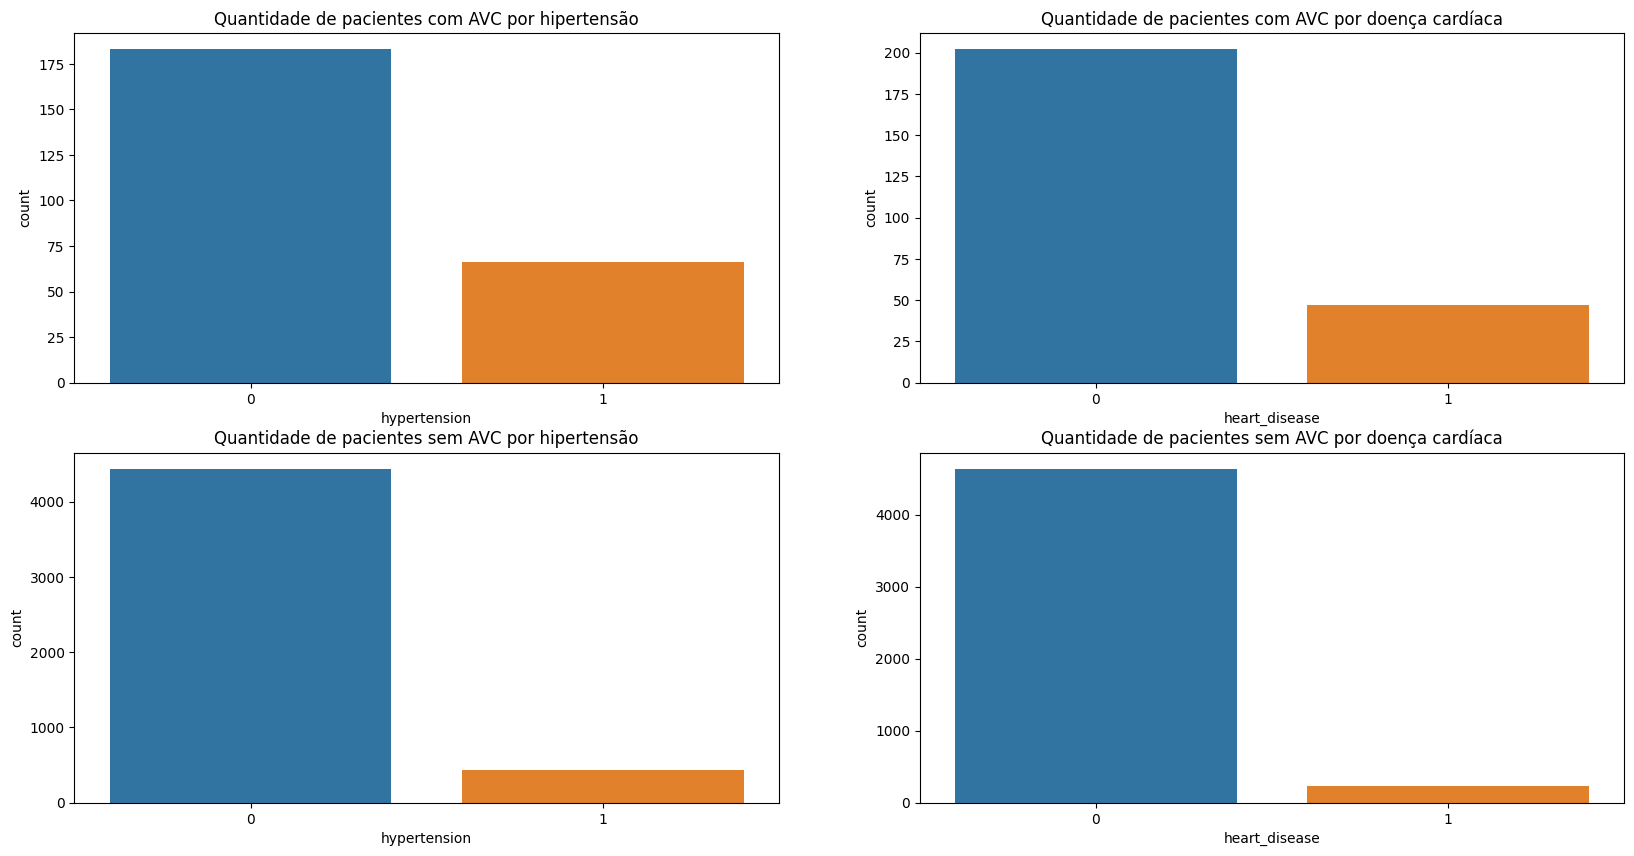

In [146]:
# plotar stroke vs hypertension e stroke vs heart_disease em gráficos diferentes
stroke_true = df[df['stroke'] == 1]
stroke_false = df[df['stroke'] == 0]

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(data=stroke_true, x='hypertension', ax=ax[0, 0])
sns.countplot(data=stroke_true, x='heart_disease', ax=ax[0, 1])
sns.countplot(data=stroke_false, x='hypertension', ax=ax[1, 0])
sns.countplot(data=stroke_false, x='heart_disease', ax=ax[1, 1])
ax[0, 0].set_title('Quantidade de pacientes com AVC por hipertensão')
ax[0, 1].set_title('Quantidade de pacientes com AVC por doença cardíaca')
ax[1, 0].set_title('Quantidade de pacientes sem AVC por hipertensão')
ax[1, 1].set_title('Quantidade de pacientes sem AVC por doença cardíaca')
plt.show()

Avaliando os gráficos acima, já é possível observar uma tendência maior de ocorrência de AVCs em pessoas com hipertensão e doença cardíaca, com os gráficos de `stroke_true` sendo maiores do que os gráficos de `stroke_false`. Vamos calcular a porcentagem de ocorrência de AVCs em pessoas com hipertensão e doença cardíaca.

In [147]:
print(f'Porcentagem de pessoas com hipertensão que tiveram AVCs: {round(stroke_true[stroke_true["hypertension"] == 1].shape[0] / stroke_true.shape[0] * 100, 2)}%')
print(f'Porcentagem de pessoas com hipertensão que não tiveram AVCs: {round(stroke_false[stroke_false["hypertension"] == 1].shape[0] / stroke_false.shape[0] * 100, 2)}%')

Porcentagem de pessoas com hipertensão que tiveram AVCs: 26.51%
Porcentagem de pessoas com hipertensão que não tiveram AVCs: 8.89%


In [148]:
print(f'Porcentagem de pessoas com doença cardíaca que tiveram AVCs: {round(stroke_true[stroke_true["heart_disease"] == 1].shape[0] / stroke_true.shape[0] * 100, 2)}%')
print(f'Porcentagem de pessoas com doença cardíaca que não tiveram AVCs: {round(stroke_false[stroke_false["heart_disease"] == 1].shape[0] / stroke_false.shape[0] * 100, 2)}%')

Porcentagem de pessoas com doença cardíaca que tiveram AVCs: 18.88%
Porcentagem de pessoas com doença cardíaca que não tiveram AVCs: 4.71%


Como pode ser observado acima, pessoas com doenças cardíacas ou com hipertensão tendem a ter maior ocorrência de AVCs. Porém, a quantidade de pessoas com AVCs é muito menor do que a quantidade de pessoas sem AVCs, o que pode causar um viés nos dados.

### Preparando os dados para o treinamento

Em seguida, vamos preparar os dados para treinamento, separando as linhas em treino e teste, separando as colunas em features e target, e obtendo as variáveis dummy para as variáveis categóricas.

In [149]:
# Separando target e features
df.drop(['id', 'bmi', 'age', 'avg_glucose_level'], axis=1, inplace=True)

X = df.drop('stroke', axis=1)
y = df['stroke']

In [150]:
# Obtendo variáveis categoricas
object_features = [feature for feature in X.columns if X[feature].dtype == 'O']
int_features = [feature for feature in X.columns if X[feature].dtype == 'int64']
categorical_features = object_features + int_features

In [151]:
# Obtendo variáveis dummy
X = X[categorical_features]

X = pd.get_dummies(X)
X.hypertension = X.hypertension.astype('bool')
X.heart_disease = X.heart_disease.astype('bool')

y = y.replace(0,-1)

X = X.to_numpy()
y = y.to_numpy()

In [152]:
X.shape, y.shape

((5110, 18), (5110,))

### Preparando e Treinando o modelo

Agora, vamos preparar o modelo para o treinamento, separando as linhas em treino e teste, e inicializando os parâmetros do modelo. Em seguida, vamos importar nosso modelo, presente no arquivo `Classificador.py`, e treinar o modelo. Nosso Classificador realiza a regressão logística, e utiliza o gradiente descendente para otimizar os parâmetros do modelo.

In [153]:
# Separando as linhas em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2555, 18), (2555, 18), (2555,), (2555,))

In [155]:
from ClassificadorAlfa import ClassificadorAlfa

In [156]:
# Inicializando os parâmetros do modelo
a = np.random.randn(X_train.shape[1], 1)
b = 1.0

X_train = X_train.T
y_train = y_train.T

parametros = [a, b, X_train, y_train]
learning_rate = 0.0001
num_iteracoes = 1000

In [157]:
classificador = ClassificadorAlfa(learning_rate, num_iteracoes, parametros)

In [160]:
# Treinando o modelo
a, b = classificador.treinar()

AttributeError: ignored

In [ ]:
a

In [ ]:
b

In [ ]:
# Fazendo previsões
ypred = a.T @ X_test.T + b
ypred

In [ ]:
acuracia = ClassificadorAlfa.acuracia(y_test, ypred)
print(f'A acurácia do modelo foi de {acuracia*100:.2f}%')